In [1]:
from IPython.display import HTML

Turbulent flow
======
***

In this practical exercise we will investigate a turbulent channel flow with some probe measurements and a visualizatin of a 2D plane of the cross section of the turbulent channel.

Probe measurements
----
***

We have placed 10 probes inside a turbulent channel flow, all at the same $x$ (streamwise) and $z$ (spanwise) location, but at different wall-normal positions $y$. 
So let's first load the probes data and then check the wall-normal position of the probes.

In [2]:
# load libraries
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('figure', titlesize=18)  # fontsize of the figure title
plt.rc('legend', fontsize=16)    # legend fontsize

[0.02783852 0.0559452  0.11408565 0.17689195 0.24742437 0.32970157
 0.42903244 0.55185549 0.70375921 0.88381108]


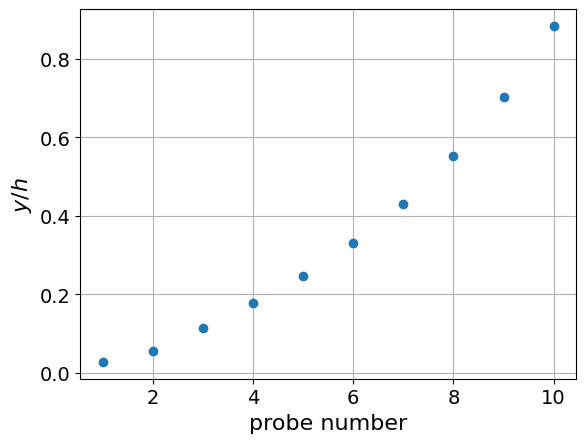

In [3]:
# Load probes data
container = np.load("data/turbulence/probes.npz")

yprobes = container["yprobes"]     # get y-position of probes out of npz-file

print(yprobes)

plt.plot(np.arange(1,11),yprobes, 'o' )
plt.xlabel('probe number')
plt.ylabel(r'$y/h$') 
plt.grid()


So the probes start at a wall-normal position of $y_{p1}=0.0278$ and go up to $y_{p10} = 0.8838$. They are normalized with the channel half height $h$, so that a wall-normal position of $y=1$ corresponds to the channel center position. 

Next we look at the time series of these probes. For this we first load the time series of $u$, $v$ and $w$ (streamwise, wall-normal and spanwise velocity component) out of the `container`, as well as the time variable.


In [4]:
uprobes = container['uprobes']   # u-component of probes 
vprobes = container['vprobes']   # v-component of probes
wprobes = container['wprobes']   # w-component of probes
t = container['t']               # time of probes

print("shape of uprobes: ", uprobes.shape)
print("shape of t      : ", t.shape)

shape of uprobes:  (10, 5999)
shape of t      :  (5999,)


We see that the first dimension of `uprobes` specifies the number of the probes and the second dimension corresponds to the number of time steps. So in this case we have 6000 time steps for each probe. 
Now we plot the $u$-component of the first, third and tenth probe. To make the plot a bit clearer, we only plot half of the time series. Feel free to change the plot and play around, you can also look at the other probes.

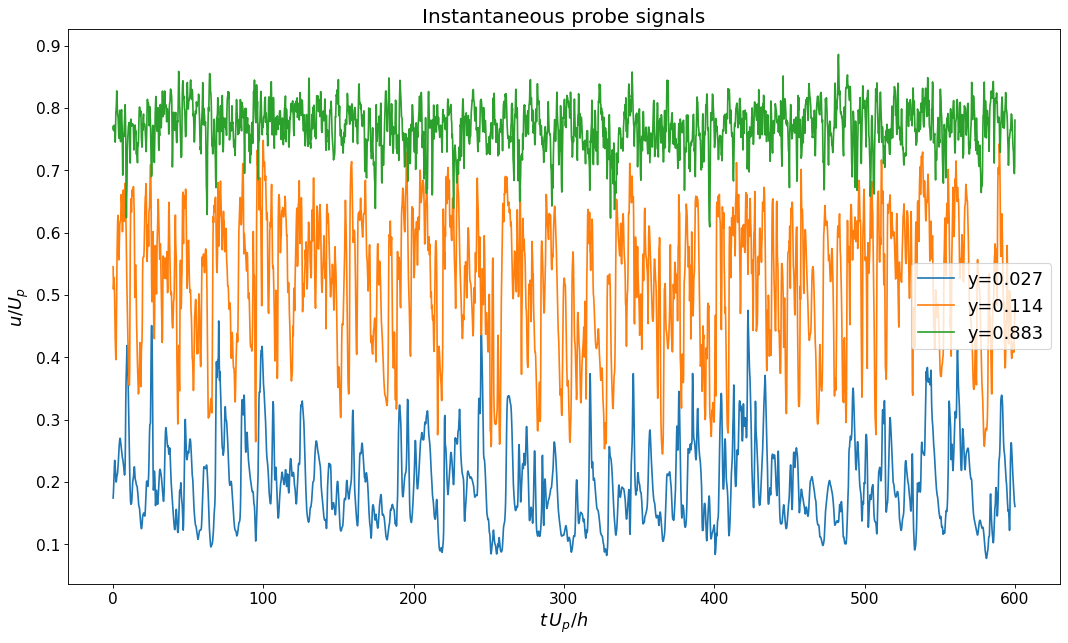

In [5]:
#for i in range(10):
plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t[:3000],uprobes[0,:3000],'-',label="y="+str(yprobes[0])[:5])
plt.plot(t[:3000],uprobes[2,:3000],'-',label="y="+str(yprobes[2])[:5])
plt.plot(t[:3000],uprobes[9,:3000],'-',label="y="+str(yprobes[9])[:5])
plt.title("Instantaneous probe signals")
plt.xlabel(r'$t \, U_p/h$') 
plt.ylabel(r'$u/U_p$')
plt.legend()

So we see, that we have turbulent signals for the $u$ velocity component, which are fluctuating in time. We can compute the time mean and the fluctuation of each probe an plot them. Velocity and time are made nondimensional with the channel semi-height $h$ and the characteristic velocity $U_p$. $U_p$ is the centreline velocity that a flow with the same flow rate would have, if it was laminar.

## Calculating the mean

Write a function `get_mean(v)` that calculates the mean of an input vector `v`. The vector `v` contains the time evolution of some generic quantity; each element of it corresponds to a different point in time. You can assume time instants to be equally spaced.

Keep in mind that, theoretically, the average $\overline{q}$ of a generic quantity $q$ is defined as:
$$ \overline{q} = \lim_{T\to\infty} \frac{1}{T} \int_0^T q \;dt $$

---

<details>
  <summary><b>Click here to show/hide hint</b> (it doesn't look like a link, but it works)</summary>
    
Of course, this cannot be done with the present discrete datasat. First off, averaging is only performed on a finite timespan $(0,T)$ - without $\lim_{t\to\infty}$. When the experiment is designed, the value of $T$ needs to be accurately decided.

Also, let $q_i$ be the value of $q$ at time $t_i$; a total of $N$ samples in time is provided. $\Delta t$ is the constant time interval between two generic $t_i$ and $t_{i+1}$. The integral can be approximated as:
$$ \int_0^T q \;dt \approx \sum_{i=1}^N q_i \Delta t $$
Keeping in mind that $T = N \Delta t$, the mean reads:
$$ \overline{q} \approx \frac{1}{T} \sum_{i=1}^N q_i \Delta t = \frac{1}{N \Delta t} \sum_{i=1}^N q_i \Delta t = \frac{1}{N} \sum_{i=1}^N q_i$$
    
</details>

---

<details>
  <summary><b>Click here to show/hide solution</b> (it doesn't look like a link, but it works)</summary>
    
```python
def get_mean(v):
    mean = 0
    N = len(v)
    for value in v:
        mean += value
    mean /= N
    return mean    
```
    
</details>

In [6]:
##### YOUR CODE HERE! #####
# the solution is provided in the cell above

The cell below tests your function against `numpy.mean()`, included in numpy. Please compare your result!

In [7]:
print(get_mean(uprobes[1]))
print(uprobes[1].mean())

NameError: name 'get_mean' is not defined

Now, the mean of various probes is calculated, as well as the fluctuation signal. Naturally, the mean of the fluctuation is (almost) zero.

Mean of probe 1 : 0.2003690719935837
Mean of probe 3 : 0.5209073141702107
Mean of probe 10: 0.7727667652379149
Mean of fluctuation of probe 1 : -1.8210692719305784e-17
Mean of fluctuation of probe 3 : 4.56007590044405e-17
Mean of fluctuation of probe 10: 3.553305896449909e-18


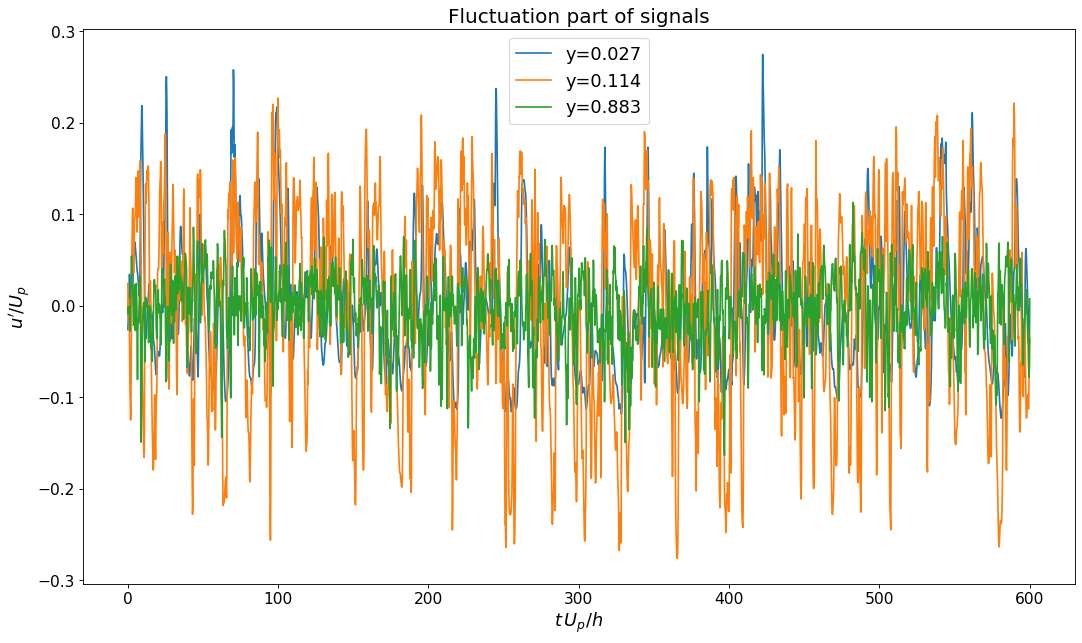

In [8]:
um_probes = uprobes.mean(axis=1)    # compute means of probes
ufl_probes = uprobes - um_probes[:,np.newaxis]   # compute fluctuation of probes

print("Mean of probe 1 :",um_probes[0])
print("Mean of probe 3 :",um_probes[2])
print("Mean of probe 10:",um_probes[9])

print("Mean of fluctuation of probe 1 :",ufl_probes.mean(axis=1)[0])
print("Mean of fluctuation of probe 3 :",ufl_probes.mean(axis=1)[2])
print("Mean of fluctuation of probe 10:",ufl_probes.mean(axis=1)[9])

plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t[:3000],ufl_probes[0,:3000],'-',label="y="+str(yprobes[0])[:5])
plt.plot(t[:3000],ufl_probes[2,:3000],'-',label="y="+str(yprobes[2])[:5])
plt.plot(t[:3000],ufl_probes[9,:3000],'-',label="y="+str(yprobes[9])[:5])
plt.title("Fluctuation part of signals")
plt.xlabel(r'$t \, U_p/h$') 
plt.ylabel(r'$u^\prime/U_p$')
plt.legend()

We see, that the mean values of our probe signals differ with the height and that the mean of the fluctuation part is zero (up to machine accuracy). Interestingly, the fluctuations of our probes have differnet behaviour, some of them have very strong spikes, while some other have them less pronounced.

## Fluctuation intensity
We now try to quantify the intensity of the fluctuations. For instance, we calculate the variance $\overline{u'u'}$ of the streamwise velocity fluctuation at the first station. This quantity appears in the definition of both the turbulent kinetic energy and the Reynolds stress tensor. To do this, you can use:
- the full velocity signal `uprobes[0,:]` or `uprobes[0]` (the two expressions are equivalent)
- the mean `um_probes[0]`
- the fluctuation signal `ufl_probes[0,:]` or `ufl_probes[0]` (the two expressions are equivalent)

Usage of `numpy_vector.mean()` and `numpy_vector.var()` is recommended.

---

<details>
  <summary><b>Click here to show/hide solution</b> (it doesn't look like a link, but it works)</summary>
    
Approach 1: variance of full velocity signal
    
```python
var_uu = uprobes[0].var()    
```
    
Approach 2: mean of square of fluctuation
    
```python
uu = ufl_probes[0,:]**2
var_uu = uu.mean()   
```
    
</details>

In [ ]:
##### YOUR CODE HERE! #####
# the solution is provided in the cell above

So let's check the standard deviation of the fluctuation parts. Remember that the standard deviation can be computed by using the square root mean of the fluctuations (square root of the variance). 

In [ ]:
ustd_probes = np.sqrt( (ufl_probes**2).mean(axis=1) )

plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.arange(1,11),ustd_probes, 'o' )
plt.xlabel('probe number') 
plt.ylabel(r'$ \sqrt{ \overline{u^\prime u^\prime } }/U_p^2$')
plt.grid()

The plot tells us, that the third probe has the highest standard deviation among all probes, meaning that this signal has the widest variation of its mean value. This was already noticable in the fluctuation plot, where we see that the third probe has on average a wider value range apart from 0. 

With this we can now plot the mean value and its standard deviation over the wall-normal position. And to compare our obtained statistics we plot reference statistics which were obtained by averaging in time and in the homogeneous streamwise and spanwise directions. 


In [ ]:
container = np.load("data/turbulence/mean.npz")
ym = container["y"]
um = container["um"]
vm = container["vm"]
wm = container["wm"]

plt.figure(figsize=(12, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.errorbar(yprobes, um_probes, ustd_probes, linestyle='None', marker='o', capsize=6, label="probes")
plt.plot(ym[:97],um[:97], 'r-', label="reference statistics")
plt.ylabel(r'$u/U_p$')
plt.xlabel('y/h') 
plt.legend()
plt.grid()

Our mean values are quite close to the reference statistics. This comes from the fact, that our reference statistics not only uses the time mean at one position, it also uses the homogeneous flow direction to converge statistics faster. If we only have our probe signals and want to improve our statistics, we need to collect longer time series to reach fully converged statistics.

Now you have everything to compute the statistics for the wall-normal and spanwise velocity component and compare it to the reference statistics. 

2D instantaneous plane
----
***

In this section we will look at an instantaneous 2D plane of our turbulent channel flow with Reynolds number of $Re_\tau = 180$. The plane is positioned in the cross section of our channel. The data comes from a Direct Numerical Simulation, where no turbulence model was used, so all turbulent scales are well resolved. The simulation domain has a domain lenght of $L_x = 16 h$, Ly = $2h$ and $L_z=8h$ in streamwise, wall-normal and spanwise direction, where $h$ is the half-channel height.

We first load the data of the plane and then plot it with the `pcolormesh` command, which is suited for 2d colour plots.

In [ ]:
container = np.load("data/turbulence/plane.npz")
y = container["y"]
z = container["z"]
u = container["u"]
v = container["v"]
w = container["w"]

plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
im= plt.pcolormesh(z,y,u,shading="gouraud")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("z")
plt.ylabel("y")
plt.title("u velocity component")
# colorbar settings
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

Close to the walls we see several blue spots, which are looking like littel mushrooms. These structures are called plumes and they displays events of ejections, where low streamwise momentum is pushed towards the bulk of the channel. These events of ejections contribute to the stronger mixing of momentum and heat in turbulent flows compared to laminar flows. 

Next we can plot the wall-normal profile of all three velocity components at a specific $z$-position. You can play around with this position by varying the variable `zid`.

In [ ]:
zid = 10

plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(y,u[:,zid],label="u")
plt.plot(y,v[:,zid],label="v")
plt.plot(y,w[:,zid],label="w")
plt.xlabel(r"$y/h$")
plt.ylabel(r'velocity/$U_p$')
plt.title("velocity components at z = " + str(z[zid])[:5])
plt.legend()


Additionally, we can plot the velocitites along the spanwise direction at a constant wall-position.

In [ ]:
yid = 10

plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(z,u[yid,:],label="u")
plt.plot(z,v[yid,:],label="v")
plt.plot(z,w[yid,:],label="w")
plt.xlabel("$z/h$")
plt.ylabel(r'velocity/$U_p$')
plt.title("velocity components at y = " + str(y[yid])[:5])
plt.legend()

Now, feel free to plot the instantaneous 2D planes of the wall-normal and spanwise velocity components or play around with the line plots and see how the velocities change with the wall-normal or spanwise position.